# Plots Comparing Different Policy Ranking Methods

In [2]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [4]:
grad_norm_correlation_loc = "data/15zone/grad_norm/spearman_corr/gradnorm_spearman_corr_15_days_06_09_2022.pkl"
snip_correlation_loc = "data/15zone/snip/spearman_corr/snip_spearman_corr_15_days_06_09_2022.pkl"
jacob_cov_correlation_loc = "data/15zone/jacob_cov/spearman_corr/jacob_cov_spearman_corr_15_days_19_07_2022_new_policies.pkl"
synflow_correlation_loc = "data/15zone/synflow/spearman_corr/synflow_spearman_corr_15_days_19_07_2022_new_policies.pkl"

grad_norm_correlation_loc_30 = "data/15zone/grad_norm/spearman_corr/grad_norm_ipw_spearman_corrs_30_days_02_08_2022_new_policies.pkl"
snip_correlation_loc_30 = "data/15zone/snip/spearman_corr/snip_spearman_corr_30_days_02_08_2022.pkl"
jacob_cov_correlation_loc_30 = "data/15zone/jacob_cov/spearman_corr/jacob_cov_spearman_corr_30_days_19_07_2022_new_policies.pkl"
synflow_correlation_loc_30 = "data/15zone/synflow/spearman_corr/synflow_spearman_corr_30_days_19_07_2022_new_policies.pkl"

ipw_correlation_loc_15 = "data/15zone/ipw/spearman_corr/ipw_spearman_corr_15_days_06_08_2022.pkl"
snipw_correlation_loc_15 = "data/15zone/snipw/spearman_corr/snipw_spearman_corr_15_days_19_07_2022_new_policies.pkl"
ipw_correlation_loc = "data/15zone/ipw/spearman_corr/ipw_spearman_corrs_30_days_19_07_2022_new_policies.pkl"
snipw_correlation_loc = "data/15zone/snipw/spearman_corr/snipw_spearman_corr_30_days_19_07_2022_new_policies.pkl"

continuous_gaussian_15 = "data/15zone/ContinuousActionGaussian/spearman_corr/GaussianKernel_0.3_15_days_06_09_2022.pkl"
continuous_gaussian_30 = "data/15zone/ContinuousActionGaussian/spearman_corr/continuous_action_gaussian_0.3_spearman_corr_30_days_01_08_2022.pkl"

# ucb_correlation_1_0_loc = "data/ucb_corr_12_07_2022.pkl"

# fqe_corr_loc_0 = "data/fqe_spearman_corr_12_07_2022.pkl"

with open(grad_norm_correlation_loc, "rb") as f:
    grad_norm_corr = pickle.load(f)

with open(snip_correlation_loc, "rb") as f:
    snip_corr = pickle.load(f)

with open(jacob_cov_correlation_loc, "rb") as f:
    jacob_cov_corr = pickle.load(f)

with open(synflow_correlation_loc, "rb") as f:
    synflow_corr = pickle.load(f)

with open(ipw_correlation_loc, "rb") as f:
    ipw_corr = pickle.load(f)

with open(snipw_correlation_loc, "rb") as f:
    snipw_corr = pickle.load(f)

with open(ipw_correlation_loc_15, "rb") as f:
    ipw_corr_15 = pickle.load(f)

with open(snipw_correlation_loc_15, "rb") as f:
    snipw_corr_15 = pickle.load(f)
    
with open(grad_norm_correlation_loc_30, "rb") as f:
    grad_norm_corr_30 = pickle.load(f)

with open(snip_correlation_loc_30, "rb") as f:
    snip_corr_30 = pickle.load(f)
    
with open(jacob_cov_correlation_loc_30, "rb") as f:
    jacob_cov_corr_30 = pickle.load(f)

with open(synflow_correlation_loc_30, "rb") as f:
    synflow_corr_30 = pickle.load(f)

with open(continuous_gaussian_15, "rb") as f:
    continuous_gauss_corr_15 = pickle.load(f)

with open(continuous_gaussian_30, "rb") as f:
    continuous_gauss_corr_30 = pickle.load(f)
    
# with open(ucb_correlation_1_0_loc, "rb") as f:
#     ucb_corr_1_0 = pickle.load(f)
    
# with open(fqe_corr_loc_0, "rb") as f:
#     fqe_corr_0 = pickle.load(f)

## Spearman Correlation Across all Zones

In [16]:
grad_norm_abs = [abs(val.correlation) for val in grad_norm_corr.values()]
snip_abs = [abs(val.correlation) for val in snip_corr.values()]
jacob_cov_abs = [abs(val.correlation) for val in jacob_cov_corr.values()]
synflow_abs = [abs(val.correlation) for val in synflow_corr.values()]

grad_norm_abs_30 = [abs(val.correlation) for val in grad_norm_corr_30.values()]
snip_abs_30 = [abs(val.correlation) for val in snip_corr_30.values()]
jacob_cov_abs_30 = [abs(val.correlation) for val in jacob_cov_corr_30.values()]
synflow_abs_30 = [abs(val.correlation) for val in synflow_corr_30.values()]

ipw_abs = [abs(val.correlation) for val in ipw_corr.values()]
snipw_abs = [abs(val.correlation) for val in snipw_corr.values()]

ipw_abs_15 = [abs(val.correlation) for val in ipw_corr_15.values()]
snipw_abs_15 = [abs(val.correlation) for val in snipw_corr_15.values()]

cont_gauss_abs_15 = [abs(val.correlation) for val in continuous_gauss_corr_15.values()]
cont_gauss_abs_30 = [abs(val.correlation) for val in continuous_gauss_corr_30.values()]

# ucb_abs_1_0 = [abs(val.correlation) for val in ucb_corr_1_0.values()]

# fqe_abs_0 = [abs(val.correlation) for val in fqe_corr_0.values()]


grad_norm_df = pd.DataFrame()
grad_norm_df["method"] = ["ZCP: GN+IPW" for i in range(len(grad_norm_abs))]
grad_norm_df["correlation"] = grad_norm_abs

snip_df = pd.DataFrame()
snip_df["method"] = ["ZCP: SNIP+IPW" for i in range(len(snip_abs))]
snip_df["correlation"] = snip_abs

jacob_cov_df = pd.DataFrame()
jacob_cov_df["method"] = ["ZCP: JC" for i in range(len(jacob_cov_abs))]
jacob_cov_df["correlation"] = jacob_cov_abs

synflow_df = pd.DataFrame()
synflow_df["method"] = ["ZCP: Synflow" for i in range(len(synflow_abs))]
synflow_df["correlation"] = synflow_abs

grad_norm_df_30 = pd.DataFrame()
grad_norm_df_30["method"] = ["ZCP: GN+IPW" for i in range(len(grad_norm_abs_30))]
grad_norm_df_30["correlation"] = grad_norm_abs_30

snip_df_30 = pd.DataFrame()
snip_df_30["method"] = ["ZCP: SNIP+IPW" for i in range(len(snip_abs_30))]
snip_df_30["correlation"] = snip_abs_30

jacob_cov_df_30 = pd.DataFrame()
jacob_cov_df_30["method"] = ["ZCP: JC" for i in range(len(jacob_cov_abs_30))]
jacob_cov_df_30["correlation"] = jacob_cov_abs_30

synflow_df_30 = pd.DataFrame()
synflow_df_30["method"] = ["ZCP: Synflow" for i in range(len(synflow_abs_30))]
synflow_df_30["correlation"] = synflow_abs_30

ipw_df = pd.DataFrame()
ipw_df["method"] = ["OPE: IPW" for i in range(len(ipw_abs))]
ipw_df["correlation"] = ipw_abs

snipw_df = pd.DataFrame()
snipw_df["method"] = ["OPE: SNIPW" for i in range(len(snipw_abs))]
snipw_df["correlation"] = snipw_abs

ipw_df_15 = pd.DataFrame()
ipw_df_15["method"] = ["OPE: IPW" for i in range(len(ipw_abs_15))]
ipw_df_15["correlation"] = ipw_abs_15

snipw_df_15 = pd.DataFrame()
snipw_df_15["method"] = ["OPE: SNIPW" for i in range(len(snipw_abs_15))]
snipw_df_15["correlation"] = snipw_abs_15

cont_gauss_15_df = pd.DataFrame()
cont_gauss_15_df["method"] = ["OPE: GaussK" for i in range(len(cont_gauss_abs_15))]
cont_gauss_15_df["correlation"] = cont_gauss_abs_15

cont_gauss_30_df = pd.DataFrame()
cont_gauss_30_df["method"] = ["OPE: GK" for i in range(len(cont_gauss_abs_30))]
cont_gauss_30_df["correlation"] = cont_gauss_abs_30

# ucb_df_0_1 = pd.DataFrame()
# ucb_df_0_1["method"] = ["UCB: (1)" for i in range(len(ucb_abs_1_0))]
# ucb_df_0_1["correlation"] = ucb_abs_1_0

# fqe_df_0 = pd.DataFrame()
# fqe_df_0["method"] = ["OPE: FQE (30)" for i in range(len(fqe_abs_0))]
# fqe_df_0["correlation"] = fqe_abs_0

# boxplot_df = pd.concat([grad_norm_df, # grad_norm_df_30,
#                         snip_df, # snip_df_30,
#                         jacob_cov_df, # jacob_cov_df_30,
#                         synflow_df, # synflow_df_30,
#                         ipw_df_15, # ipw_df,
#                         snipw_df_15, # snipw_df,
#                         cont_gauss_15_df]), # cont_gauss_30_df])  # , fqe_df_0,
#                         # ucb_df_0_1])
# boxplot_df = pd.concat([grad_norm_df, snip_df, jacob_cov_df, synflow_df, ipw_df_15, snipw_df_15, cont_gauss_15_df])
boxplot_df = pd.concat([grad_norm_df, snip_df, ipw_df_15, cont_gauss_15_df])

In [17]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}
plt.rc("font", **font)


([<matplotlib.axis.YTick at 0x13f1dbe80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

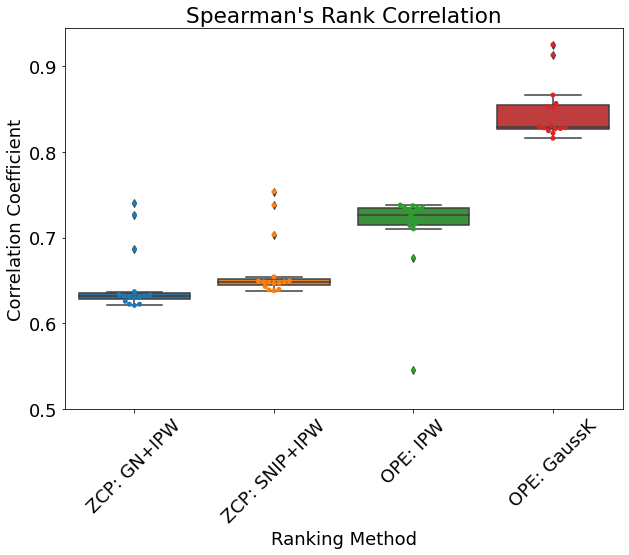

In [18]:
plt.figure(figsize=(10, 7))

plt.title("Spearman's Rank Correlation")
sns.boxplot(x="method", y="correlation", data=boxplot_df)
sns.swarmplot(x="method", y="correlation", data=boxplot_df)
plt.xlabel("Ranking Method")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.yticks(np.arange(0.5, 0.96, step=0.1))
# plt.savefig("plots/spearman_corr_boxplot_11_08_2022_new_policies.pdf", dpi=300, bbox_inches="tight")

In [15]:
boxplot_df[boxplot_df["method"] == "OPE: GaussK"].describe()

,correlation
count,15.000000
mean,0.846813
std,0.032915
min,0.816125
25%,0.827228
50%,0.829649
75%,0.854951
max,0.925337
